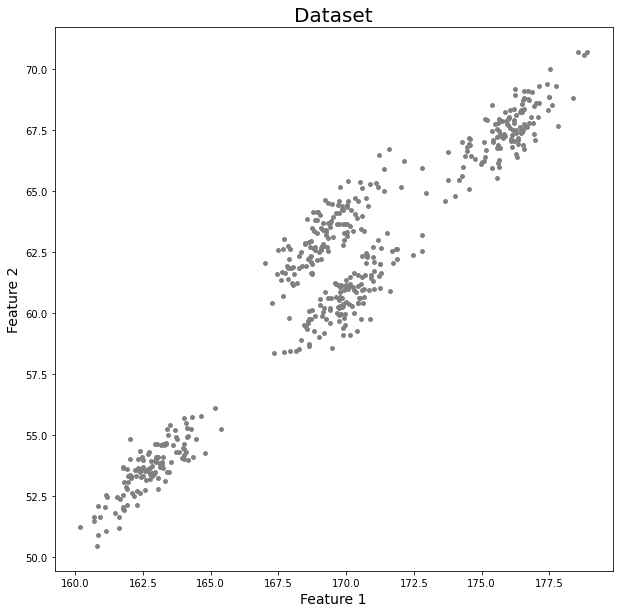

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import data
data_table = pd.read_csv("Clustering_gmm.csv")

#plot data
plt.figure(figsize=(10,10))
plt.scatter([i for i in data_table['Height']],[i for i in data_table['Weight']],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


data_table

In [76]:
#check if the data has null values
data_table.isnull().any().any()

False

In [77]:
total_points = data_table.shape[0]

In [78]:
#get array of values from the dataframe
x = data_table.loc[:, :].values

x

array([[ 67.06292382, 176.0863547 ],
       [ 68.80409404, 178.38866853],
       [ 60.93086317, 170.28449577],
       [ 59.73384301, 168.6919918 ],
       [ 65.43123003, 173.76367903],
       [ 61.57716033, 168.09175124],
       [ 63.34186626, 170.64251603],
       [ 61.04164336, 170.09668166],
       [ 62.63362335, 171.86297157],
       [ 53.40785962, 162.75684311],
       [ 62.93820031, 168.71007855],
       [ 68.5548571 , 176.4737468 ],
       [ 65.1630426 , 171.17658204],
       [ 53.44601711, 162.91516701],
       [ 60.65937349, 170.64765908],
       [ 59.17655435, 169.19080975],
       [ 67.16384091, 176.33706853],
       [ 60.6270339 , 169.84811911],
       [ 53.96476395, 162.4905542 ],
       [ 60.35999202, 169.89078752],
       [ 59.85687102, 168.85468537],
       [ 68.02783468, 177.0751606 ],
       [ 64.59160046, 170.06283827],
       [ 53.55139341, 162.25694859],
       [ 60.44702902, 170.00817842],
       [ 54.83092473, 163.76973667],
       [ 69.30872116, 177.11158493],
 

In [79]:
#set eps and minPts
eps = 0.5
minPts = 10

[-1  0  1  2  3  4]


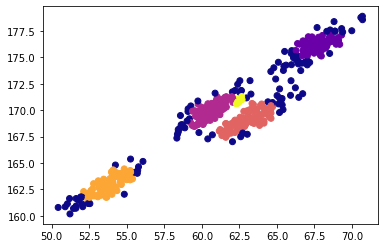

In [80]:
import scipy as scipy

#find distance matrix which contains the distances between every pair of points in the dataset
distance_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(x, 'euclidean'))

#function to expand a cluster
def grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_point, type_point, visited,distance_matrix):
    for i in neighbours_point:
        if visited[i] == 0:
                        visited[i] = 1
                        neighbours_cluster_point = _get_neighbors(i)
                        if len(neighbours_cluster_point) >= minPts:
                             grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_cluster_point, type_point, visited,distance_matrix)
        if type_point[i] == 0:
                         type_point[i] = cluster_index
    return type_point

#function to get neighbours
def _get_neighbors(x):
        return [i for i in np.where(distance_matrix[x] <= eps)[0]]

# -1 noise
# 0 border
# 1 core

#function to find the clusters
def dbscan(total_points, visited, minPts, cluster_index, clusters_list, eps, type_point, distance_matrix):
    for i in range(total_points):
        if visited[i] == 0:
            visited[i] = 1
            neighbours_point = _get_neighbors(i)
            if len(neighbours_point) < minPts:
                type_point[i] = -1
            else:
                    type_point[i] = cluster_index

                    type_point = grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_point, type_point, visited,distance_matrix)

                    cluster_index += 1
        else:
            continue
    return type_point
                
cluster_index = 0
clusters_list = []

visited = np.zeros(total_points, 'int')
type_point = np.zeros(total_points, 'int')


type_point = dbscan(total_points, visited, minPts, cluster_index, clusters_list, eps, type_point, distance_matrix)
print(np.unique(type_point))

#plot the clusters
plt.scatter(x[:, 0], x[:,1], c = type_point, cmap= "plasma") 
plt.show() 

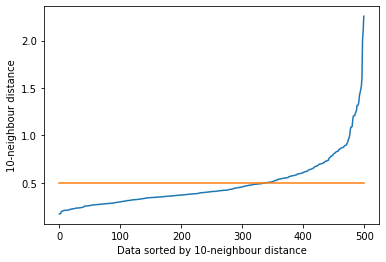

In [82]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

#find upto 8th neighbours
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(x)
#function returns the distances and indices of the neighours
distances, indices = neighbors_fit.kneighbors(x)

#sort the 8th neighbour distance
distances = np.sort(distances[:, -1])

#plot the distances
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Data sorted by {}-neighbour distance'.format(10))
plt.ylabel('{}-neighbour distance'.format(10))
#plot the epsilon
plt.plot(np.arange(len(distances)), [0.5]*len(distances))